<a href="https://colab.research.google.com/github/FelicianoRobles/FisicaComputacional1/blob/master/Actividad8(ejercicio_1_y_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas y funciones

In [ ]:
# Preparacion de datos
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [ ]:
def odeEuler(f,y0,t):
    '''Aproxima la solución de y'=f(y,t) por el método de Euler.
    
    Parámetros
    ----------
    f : La función dada por el lado derecho de la ecuación diferencial 
         y'=f(t,y), y(t_0)=y_0
    y0 : El valor inicial de y al tiempo y(t0)=y0 
    t : Arreglo unidimensional de 1D. El tamaño del paso h = t[n+1] - t[n].
    
    Regresa
    -------
    y : 1D Arreglo con la aproximación de y[n] de la solución y(t_n) calculada 
    con el método de  Euler.
    '''
    # Definimos el arreglo para las soluciones del tamaño del tiempo de integración
    y = np.zeros(len(t))
    
    # La condición inicial que debe satisfacer la solución
    y[0] = y0
    
    # LA integración por el método de Euler
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

In [ ]:
# Tomada la versión de Joshua Simon
# https://github.com/JoshuaSimon/Classic-Fourth-Order-Runge-Kutta-Method-RK4/blob/master/Four_Step_Runge_Kutta_ODE1.py

"""Four_Step_Runge_Kutta_ODE1.py 

Implementation of the classic fourth-order method also refered as the
"original" Runge–Kutta method. This method is an implicit four step
Runge-Kutta method which solves an intial value problem numerically. 
"""

from datetime import datetime
import matplotlib.pyplot as plt
from math import exp, sqrt 

__date__ = datetime(2019, 6, 6) # or version string or something
__author__ = "Joshua Simon"


def runge_kutta(f, x_0, y_0, h):
    """Four step Runge-Kutta method (RK4)
    Solves first order ODEs
    """
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

# Ejercicio 1:
Resuelva la ecuación diferencial del oscilador de Van der Pol

$$\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}$$
donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal.

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]

$$\frac{dx}{dt}=v$$
$$\frac{dv}{dt}=-x+\mu(1-x^2)v$$

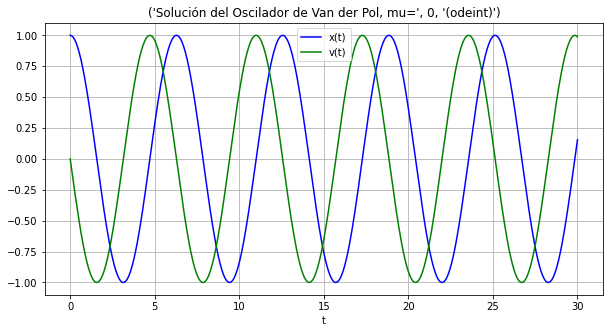

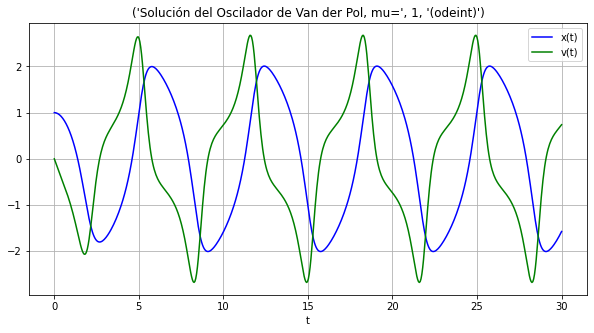

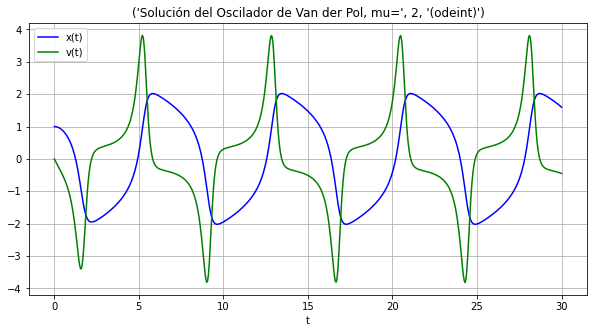

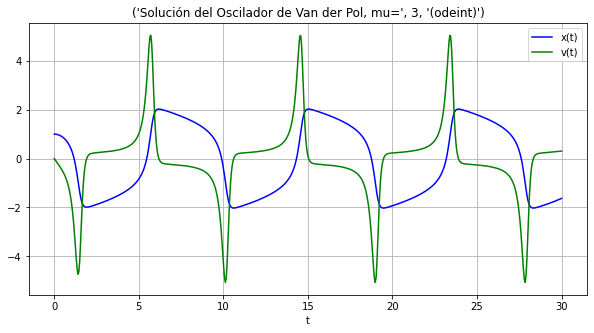

In [ ]:
# Integración utilizando 'odeint'
# definimos la función F de lado derecho de la ecuación.
def VanderPol(y,t,mu):
        x, v = y
        dydt = [v, mu*(1 - x**2)*v - x]
        return dydt

# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=30.0
Npts=600

t = np.linspace(t0,tmax,Npts) # Definimos el tiempo de integración

# Definimos las condiciones iniciales 
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [1.0, 0.0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

for mu in range(4):
  sol=odeint(VanderPol, y_0, t, args=(mu,), atol=abserr, rtol=relerr)
  y1=sol[:,0] # x(t)
  y2=sol[:,1] # v(v)
  plt.figure(figsize=(10,5))
  plt.plot(t, y1, 'b', label='x(t)')
  plt.plot(t, y2, 'g', label='v(t)')
  plt.legend(loc='best')
  plt.title(('Solución del Oscilador de Van der Pol, mu=',mu,'(odeint)'))
  plt.xlabel('t')
  plt.grid()
  plt.show()

# Ejercicio 2:
Siguiendo con el ejemplo anterior del oscilador de Van de Pol, reproduce la gráfica del plano fase ($\theta, \omega$) que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo.


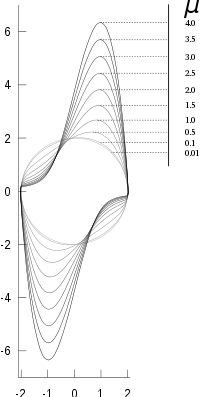

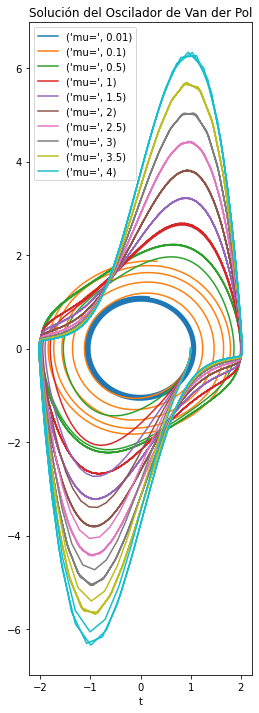

In [ ]:
# Integración utilizando 'odeint'
# definimos la función F de lado derecho de la ecuación.
def VanderPol(y,t,mu):
        x, v = y
        dydt = [v, mu*(1 - x**2)*v - x]
        return dydt

# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=30.0
Npts=600

t = np.linspace(t0,tmax,Npts) # Definimos el tiempo de integración

# Definimos las condiciones iniciales 
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [1.0, 0.0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6
plt.figure(figsize=(4,12))

for mu in [0.01,0.1,0.5,1,1.5,2,2.5,3,3.5,4]:
  sol=odeint(VanderPol, y_0, t, args=(mu,), atol=abserr, rtol=relerr)
  y1=sol[:,0] # x(t)
  y2=sol[:,1] # v(v)
  plt.plot(y1, y2, label=('mu=',mu))
  plt.legend(loc='best')
  plt.title(('Solución del Oscilador de Van der Pol'))
  plt.xlabel('t')
  plt.grid()
plt.show()
